<a href="https://colab.research.google.com/github/pranukrish/CMPE255_DataMining/blob/main/Assignment2/TimeSeriesClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

In [ ]:
!pip install pycaret-ts-alpha

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 468 kB 9.6 MB/s 
     |████████████████████████████████| 15.7 MB 19.6 MB/s 
     |████████████████████████████████| 1.8 MB 46.0 MB/s 
     |████████████████████████████████| 199 kB 47.3 MB/s 
     |████████████████████████████████| 69 kB 6.5 MB/s 
     |████████████████████████████████| 3.3 MB 43.4 MB/s 
     |████████████████████████████████| 6.5 MB 25.7 MB/s 
     |████████████████████████████████| 282 kB 41.2 MB/s 
     |████████████████████████████████| 303 kB 14.3 MB/s 
     |████████████████████████████████| 43 kB 1.9 MB/s 
     |████████████████████████████████| 79.9 MB 92 kB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
     |████████████████████████████████| 11.2 MB 45.4 MB/s 
     |████████████████████████████████| 24.8 MB 1.5 MB/s 
     |████████████████████████████████| 199 kB 49.6 MB/s 
     |█████████████████████████████

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pycaret.datasets import get_data
import pandas as pd

dataset = pd.read_csv("/content/drive/MyDrive/Data/AppleStockPrices.csv")
#dataset = get_data('credit')


In [ ]:
dataset.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [ ]:
dataset["index"] = pd.to_datetime(dataset["date"]).dt.date
dataset["index"] = pd.to_datetime(dataset["index"])


In [ ]:
dataset.drop(columns=["date"], inplace=True)
target = "close"

In [ ]:
dataset['index'].dtype

dtype('<M8[ns]')

In [ ]:
small_df = dataset[['index','close']]
small_df.set_index('index',drop = True,inplace = True)
small_df.head()
small_df=small_df.sort_index(axis=0)



In [ ]:
small_df.head()

,close
index,
2015-05-27,132.045
2015-05-28,131.780
2015-05-29,130.280
2015-06-01,130.535
2015-06-02,129.960


In [ ]:
small_df.head()
#small_df.index.freq = 'D'
small_df = small_df.asfreq('d')
#print(pd.infer_freq(small_df.index))

In [ ]:
from pycaret.time_series import TSForecastingExperiment



In [ ]:
fh = 12 # or alternately fh = np.arange(1,13)
fold = 3

In [ ]:
fig_kwargs={'renderer': 'notebook'}

In [ ]:
eda = TSForecastingExperiment()
eda.setup(data=small_df, fh=fh, fig_kwargs=fig_kwargs, numeric_imputation_target = "ffill")

INFO:logs:PyCaret TSForecastingExperiment
INFO:logs:Logging name: ts-default-name
INFO:logs:ML Usecase: MLUsecase.TIME_SERIES
INFO:logs:version 3.0.0
INFO:logs:Initializing setup()
INFO:logs:self.USI: 3f15
INFO:logs:self.variable_keys: {'X_transformed', 'seasonality_present', 'index_type', 'seed', 'fold_generator', 'master_model_container', 'exogenous_present', 'all_sp_values', 'y_train_transformed', 'data', 'y_test_transformed', 'y_test', 'pipeline', 'enforce_exogenous', '_ml_usecase', 'enforce_pi', 'n_jobs_param', 'exp_name_log', 'USI', 'approach_type', 'display_container', 'log_plots_param', 'strictly_positive', 'X', 'exp_id', 'fold_param', 'y_transformed', '_available_plots', 'html_param', 'memory', 'idx', 'gpu_param', 'X_test', 'experiment__', 'X_test_transformed', 'primary_sp_to_use', 'y_train', 'fold_groups_param_full', 'variable_keys', '_all_models', 'seasonal_period', 'X_train', 'X_train_transformed', 'fh', 'y', '_all_models_internal', '_all_metrics', 'logging_param', '_gpu_n_

,Description,Value
0,session_id,7089
1,Target,close
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Data shape,"(1823, 1)"
5,Train data shape,"(1811, 1)"
6,Test data shape,"(12, 1)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,3
9,Enforce Prediction Interval,False


INFO:logs:setup() successfully completed in 1.33s...............


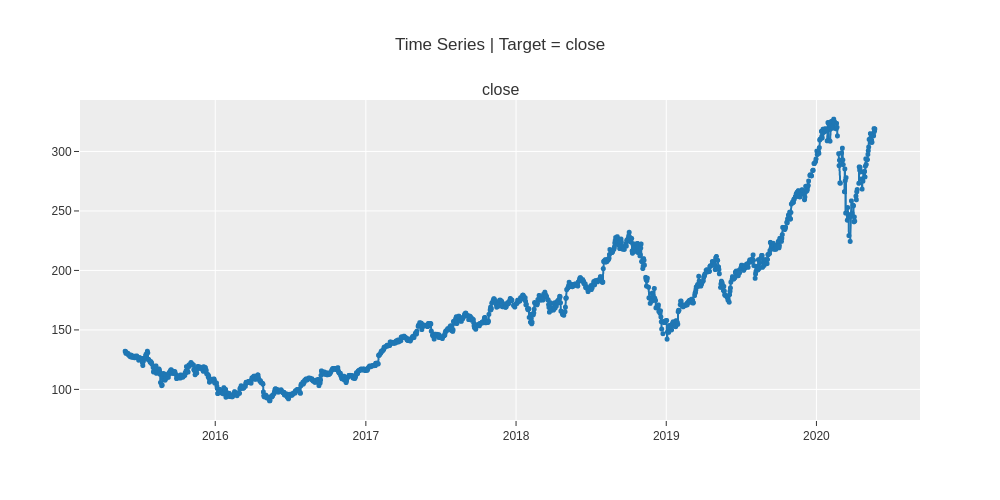

INFO:logs:Visual Rendered Successfully


In [ ]:
eda.plot_model(fig_kwargs={"renderer": "png", "width": 1000, "height": 500})  

In [ ]:
model = eda.create_model("arima", order=(1,1,0), seasonal_order=(0,1,0,12))

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2020-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-04-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-04-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mean,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SD,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:ARIMA(order=(1, 1, 0), seasonal_order=(0, 1, 0, 12))
INFO:logs:create_model() successfully completed......................................


In [ ]:
y_predict = eda.predict_model(model)
y_predict

INFO:logs:Preparing display monitor


,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,ARIMA,0,0,0,0,0,0,0


,y_pred
2020-05-11,317.9743
2020-05-12,324.4478
2020-05-13,319.6258
2020-05-14,319.6775
2020-05-15,319.6875
2020-05-16,323.7995
2020-05-17,328.2181
2020-05-18,331.3077
2020-05-19,334.4370
2020-05-20,340.8464


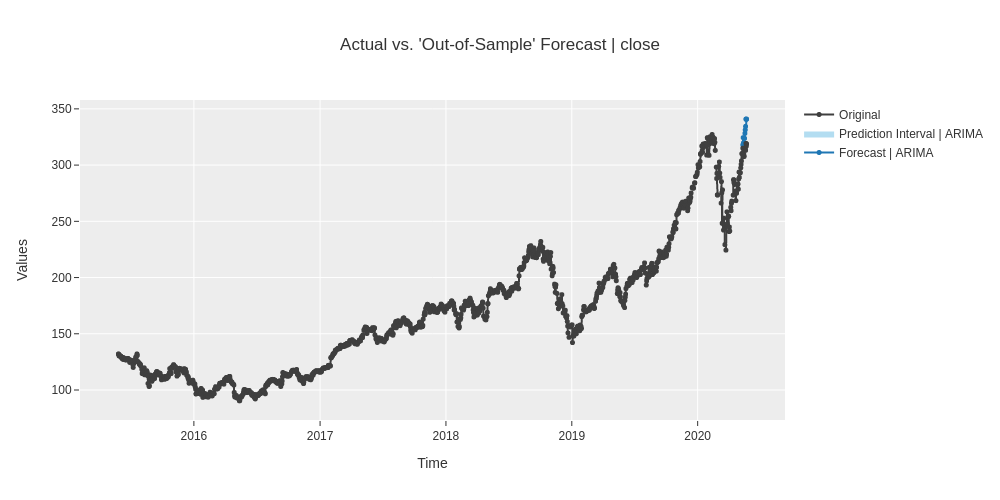

INFO:logs:Visual Rendered Successfully


In [ ]:
eda.plot_model(estimator=model,fig_kwargs={"renderer": "png", "width": 1000, "height": 500})